<a href="https://colab.research.google.com/github/RaedAffes/REFIT-Dataset-Preprocessing/blob/main/REFIT_Dataset_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

plt.rcParams['figure.figsize'] = (12, 4)

print('Libraries imported.')

Libraries imported.


# Load the dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving RAW_House5_Part2.csv to RAW_House5_Part2.csv


# show Dataset

In [64]:
columns = [
    "DateTime", "Timestamp", "Aggregate",
    "Fridge-Freezer", "Tumble Dryer", "Washing Machine",
    "Dishwasher", "Desktop Computer", "Television Site",
    "Microwave", "Kettle", "Toaster"
]

house5 = pd.read_csv("RAW_House5_Part2.csv", names=columns, header=0)

print(house5)
print("dataset shape:", house5.shape)


                    DateTime   Timestamp  Aggregate  Fridge-Freezer  \
0        2014-06-27 21:57:51  1403906271      289.0             2.0   
1        2014-06-27 21:57:59  1403906278      298.0             2.0   
2        2014-06-27 21:58:07  1403906286      381.0           134.0   
3        2014-06-27 21:58:15  1403906295        NaN           130.0   
4        2014-06-27 21:58:23  1403906302      381.0             NaN   
...                      ...         ...        ...             ...   
3964592  2015-07-06 17:48:27  1436204906      515.0           112.0   
3964593  2015-07-06 17:48:34  1436204913      515.0           112.0   
3964594  2015-07-06 17:48:42  1436204921      515.0           112.0   
3964595  2015-07-06 17:48:49  1436204928      500.0           112.0   
3964596  2015-07-06 17:48:55  1436204934      513.0           112.0   

         Tumble Dryer  Washing Machine  Dishwasher  Desktop Computer  \
0                 0.0              3.0         5.0             113.0   
1  

# Convert Time Information

In [65]:
# making time as index (id of each row)
house5['DateTime'] = pd.to_datetime(house5['DateTime'])
house5 = house5.set_index('DateTime')
house5 = house5.sort_index()

print('After datetime conversion:')
print(house5)

After datetime conversion:
                      Timestamp  Aggregate  Fridge-Freezer  Tumble Dryer  \
DateTime                                                                   
2014-06-27 21:57:51  1403906271      289.0             2.0           0.0   
2014-06-27 21:57:59  1403906278      298.0             2.0           NaN   
2014-06-27 21:58:07  1403906286      381.0           134.0           NaN   
2014-06-27 21:58:15  1403906295        NaN           130.0           NaN   
2014-06-27 21:58:23  1403906302      381.0             NaN           NaN   
...                         ...        ...             ...           ...   
2015-07-06 17:48:27  1436204906      515.0           112.0           0.0   
2015-07-06 17:48:34  1436204913      515.0           112.0           0.0   
2015-07-06 17:48:42  1436204921      515.0           112.0           0.0   
2015-07-06 17:48:49  1436204928      500.0           112.0           0.0   
2015-07-06 17:48:55  1436204934      513.0           112.0   

# Timestamp duplicates merge


In [66]:
house5 = house5.drop_duplicates(subset=['Timestamp'], keep='first')
print('After time merge:')
print(house5)

After time merge:
                      Timestamp  Aggregate  Fridge-Freezer  Tumble Dryer  \
DateTime                                                                   
2014-06-27 21:57:51  1403906271      289.0             2.0           0.0   
2014-06-27 21:57:59  1403906278      298.0             2.0           NaN   
2014-06-27 21:58:07  1403906286      381.0           134.0           NaN   
2014-06-27 21:58:15  1403906295        NaN           130.0           NaN   
2014-06-27 21:58:23  1403906302      381.0             NaN           NaN   
...                         ...        ...             ...           ...   
2015-07-06 17:48:27  1436204906      515.0           112.0           0.0   
2015-07-06 17:48:34  1436204913      515.0           112.0           0.0   
2015-07-06 17:48:42  1436204921      515.0           112.0           0.0   
2015-07-06 17:48:49  1436204928      500.0           112.0           0.0   
2015-07-06 17:48:55  1436204934      513.0           112.0           0

# Remove values > 4000

In [67]:
iam_cols = [
    "Fridge-Freezer", "Tumble Dryer", "Washing Machine",
    "Dishwasher", "Desktop Computer", "Television Site",
    "Microwave", "Kettle", "Toaster"
]

for col in iam_cols:
    house5.loc[house5[col] > 4000, col] = 0

print("IAM rule applied: values above 4000 W reset to 0")
print(house5)




IAM rule applied: values above 4000 W reset to 0
                      Timestamp  Aggregate  Fridge-Freezer  Tumble Dryer  \
DateTime                                                                   
2014-06-27 21:57:51  1403906271      289.0             2.0           0.0   
2014-06-27 21:57:59  1403906278      298.0             2.0           NaN   
2014-06-27 21:58:07  1403906286      381.0           134.0           NaN   
2014-06-27 21:58:15  1403906295        NaN           130.0           NaN   
2014-06-27 21:58:23  1403906302      381.0             NaN           NaN   
...                         ...        ...             ...           ...   
2015-07-06 17:48:27  1436204906      515.0           112.0           0.0   
2015-07-06 17:48:34  1436204913      515.0           112.0           0.0   
2015-07-06 17:48:42  1436204921      515.0           112.0           0.0   
2015-07-06 17:48:49  1436204928      500.0           112.0           0.0   
2015-07-06 17:48:55  1436204934      51

# Removing NaN values with forward fill

In [68]:
print('Missing values per column:')
print(house5.isna().sum())

# Calculate time difference between consecutive rows
house5["time_diff"] = house5.index.to_series().diff().dt.total_seconds().fillna(0)

# Appliance columns
appliance_cols = [
    "Aggregate","Fridge-Freezer", "Tumble Dryer", "Washing Machine",
    "Dishwasher", "Desktop Computer", "Television Site",
    "Microwave", "Kettle", "Toaster"
]

# Apply conditional fill
for col in appliance_cols:
    # Forward fill only for short gaps (<120s)
    mask_short = house5["time_diff"] < 120
    house5.loc[mask_short, col] = house5[col].ffill()[mask_short]

    # Zero out for long gaps (>=120s)
    mask_long = house5["time_diff"] >= 120
    house5.loc[mask_long, col] = house5[col].fillna(0)[mask_long]

print("new dataset after removing NAN:\n ", house5)



Missing values per column:
Timestamp                 0
Aggregate            163895
Fridge-Freezer       298160
Tumble Dryer        1535975
Washing Machine     1800733
Dishwasher           199283
Desktop Computer     439487
Television Site      466592
Microwave            328543
Kettle               320843
Toaster              294622
dtype: int64
new dataset after removing NAN:
                        Timestamp  Aggregate  Fridge-Freezer  Tumble Dryer  \
DateTime                                                                   
2014-06-27 21:57:51  1403906271      289.0             2.0           0.0   
2014-06-27 21:57:59  1403906278      298.0             2.0           0.0   
2014-06-27 21:58:07  1403906286      381.0           134.0           0.0   
2014-06-27 21:58:15  1403906295      381.0           130.0           0.0   
2014-06-27 21:58:23  1403906302      381.0           130.0           0.0   
...                         ...        ...             ...           ...   
2015-07-06

# Resample to a Common Time Resolution

In [75]:
freq = '2min'  # 2-minute frequency

# Select all columns except the first and last
cols_to_resample = house5.columns[1:-1]

# Resample only those columns
house5_resampled = house5[cols_to_resample].resample(freq).mean()

print("After resampling:")
print(house5_resampled)


After resampling:
                      Aggregate  Fridge-Freezer  Tumble Dryer  \
DateTime                                                        
2014-06-27 21:56:00  293.500000        2.000000           0.0   
2014-06-27 21:58:00  372.428571      119.000000           0.0   
2014-06-27 22:00:00  359.533333      103.866667           0.0   
2014-06-27 22:02:00  361.000000      100.750000           0.0   
2014-06-27 22:04:00  361.933333      100.866667           0.0   
...                         ...             ...           ...   
2015-07-06 17:40:00  535.764706      112.000000           0.0   
2015-07-06 17:42:00  537.000000      112.000000           0.0   
2015-07-06 17:44:00  577.529412      112.000000           0.0   
2015-07-06 17:46:00  555.888889      112.000000           0.0   
2015-07-06 17:48:00  591.875000      112.000000           0.0   

                     Washing Machine  Dishwasher  Desktop Computer  \
DateTime                                                          

# Reduce high-frequency noise

In [77]:
# 2-minute data, smooth with 10-minute rolling mean
house5_smoothed = house5_resampled.rolling(window=10, min_periods=1).mean() # moyenne de 10 minute

print(house5_smoothed)


                      Aggregate  Fridge-Freezer  Tumble Dryer  \
DateTime                                                        
2014-06-27 21:56:00  293.500000        2.000000      0.000000   
2014-06-27 21:58:00  332.964286       60.500000      0.000000   
2014-06-27 22:00:00  341.820635       74.955556      0.000000   
2014-06-27 22:02:00  346.615476       81.404167      0.000000   
2014-06-27 22:04:00  349.679048       85.296667      0.000000   
...                         ...             ...           ...   
2015-07-06 17:40:00  566.635300       73.773054      0.000229   
2015-07-06 17:42:00  565.658022       73.784054      0.000229   
2015-07-06 17:44:00  564.681552       73.794221      0.000229   
2015-07-06 17:46:00  564.123676       73.802515      0.000229   
2015-07-06 17:48:00  564.221607       73.810126      0.000229   

                     Washing Machine  Dishwasher  Desktop Computer  \
DateTime                                                             
2014-06-27 21:

# Normalize

In [128]:


# Convert the whole DataFrame to NumPy
values = house5_smoothed.to_numpy()

# Scale all columns together
scaler = MinMaxScaler()
house5_scaled = scaler.fit_transform(values)

# Convert back to DataFrame with same column names
house5_scaled = pd.DataFrame(house5_scaled,
                                index=house5_smoothed.index,
                                columns=house5_smoothed.columns)

print("Scaled values sample:")
print(house5_scaled.head())

# Add: Store time information before flattening
daily_timestamps = house5_scaled.groupby(house5_scaled.index.date).apply(
    lambda day_df: day_df.index.time
)

# Create a new index that matches the flattened length
# Repeat each timestamp for each column
new_index = house5_smoothed.index.repeat(len(house5_smoothed.columns))

# Re-build a Series with the scaled values and the expanded index
df_scaled = pd.Series(house5_scaled.to_numpy().flatten(), index=new_index)

# Group by day
daily_series = df_scaled.resample('D').apply(list)

print('Number of days:', len(daily_series))
print('Example of one day vector length:', len(daily_series.iloc[0]))


Scaled values sample:
                     Aggregate  Fridge-Freezer  Tumble Dryer  Washing Machine  \
DateTime                                                                        
2014-06-27 21:56:00   0.054784        0.000498           0.0         0.004052   
2014-06-27 21:58:00   0.067484        0.204478           0.0         0.004052   
2014-06-27 22:00:00   0.070334        0.254882           0.0         0.004052   
2014-06-27 22:02:00   0.071877        0.277368           0.0         0.004073   
2014-06-27 22:04:00   0.072863        0.290940           0.0         0.004177   

                     Dishwasher  Desktop Computer  Television Site  Microwave  \
DateTime                                                                        
2014-06-27 21:56:00    0.004629          0.765840              0.0        0.0   
2014-06-27 21:58:00    0.004332          0.773117              0.0        0.0   
2014-06-27 22:00:00    0.004225          0.768974              0.0        0.0   
2014-

# Segment into Daily Windows

In [120]:
# TODO: Build daily windows

# Create a new index that matches the flattened length
# Repeat each timestamp for each column
new_index = house5_smoothed.index.repeat(len(house5_smoothed.columns))

# Re-build a Series with the scaled values and the expanded index
df_scaled = pd.Series(house5_scaled.to_numpy().flatten(), index=new_index)

# Group by day
daily_series = df_scaled.resample('D').apply(list)

print('Number of days:', len(daily_series))
print('Example of one day vector length:', len(daily_series.iloc[0]))
print(daily_series)

Number of days: 375
Example of one day vector length: 620
DateTime
2014-06-27    [0.05478448349029847, 0.0004981198844505805, 0...
2014-06-28    [0.1160755652743794, 0.17178725026143293, 0.0,...
2014-06-29    [0.27497112823827696, 0.23199334426832305, 0.1...
2014-06-30    [0.24838360646637514, 0.24870954305821943, 0.0...
2014-07-01    [0.1709698957113767, 0.23713720992862797, 0.00...
                                    ...                        
2015-07-02    [0.1526905695355692, 0.2726939377565455, 8.881...
2015-07-03    [0.1494099094013741, 0.26241814592967105, 4.60...
2015-07-04    [0.16830612933222655, 0.2478367574368255, 0.00...
2015-07-05    [0.1663917683093723, 0.28746080528036483, 7.16...
2015-07-06    [0.17013293752840833, 0.2882570223573959, 1.50...
Freq: D, Length: 375, dtype: object


# Sanity Checks & Visualization

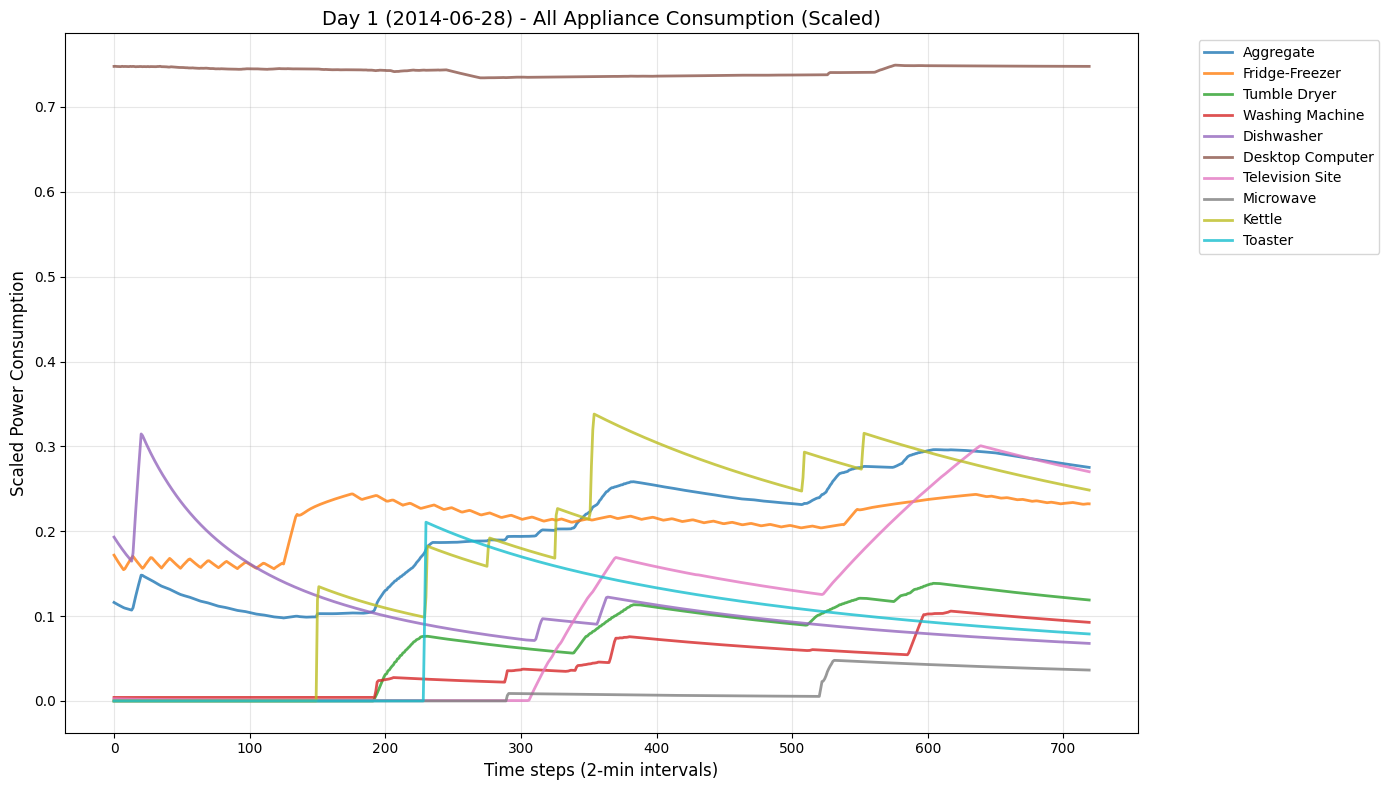

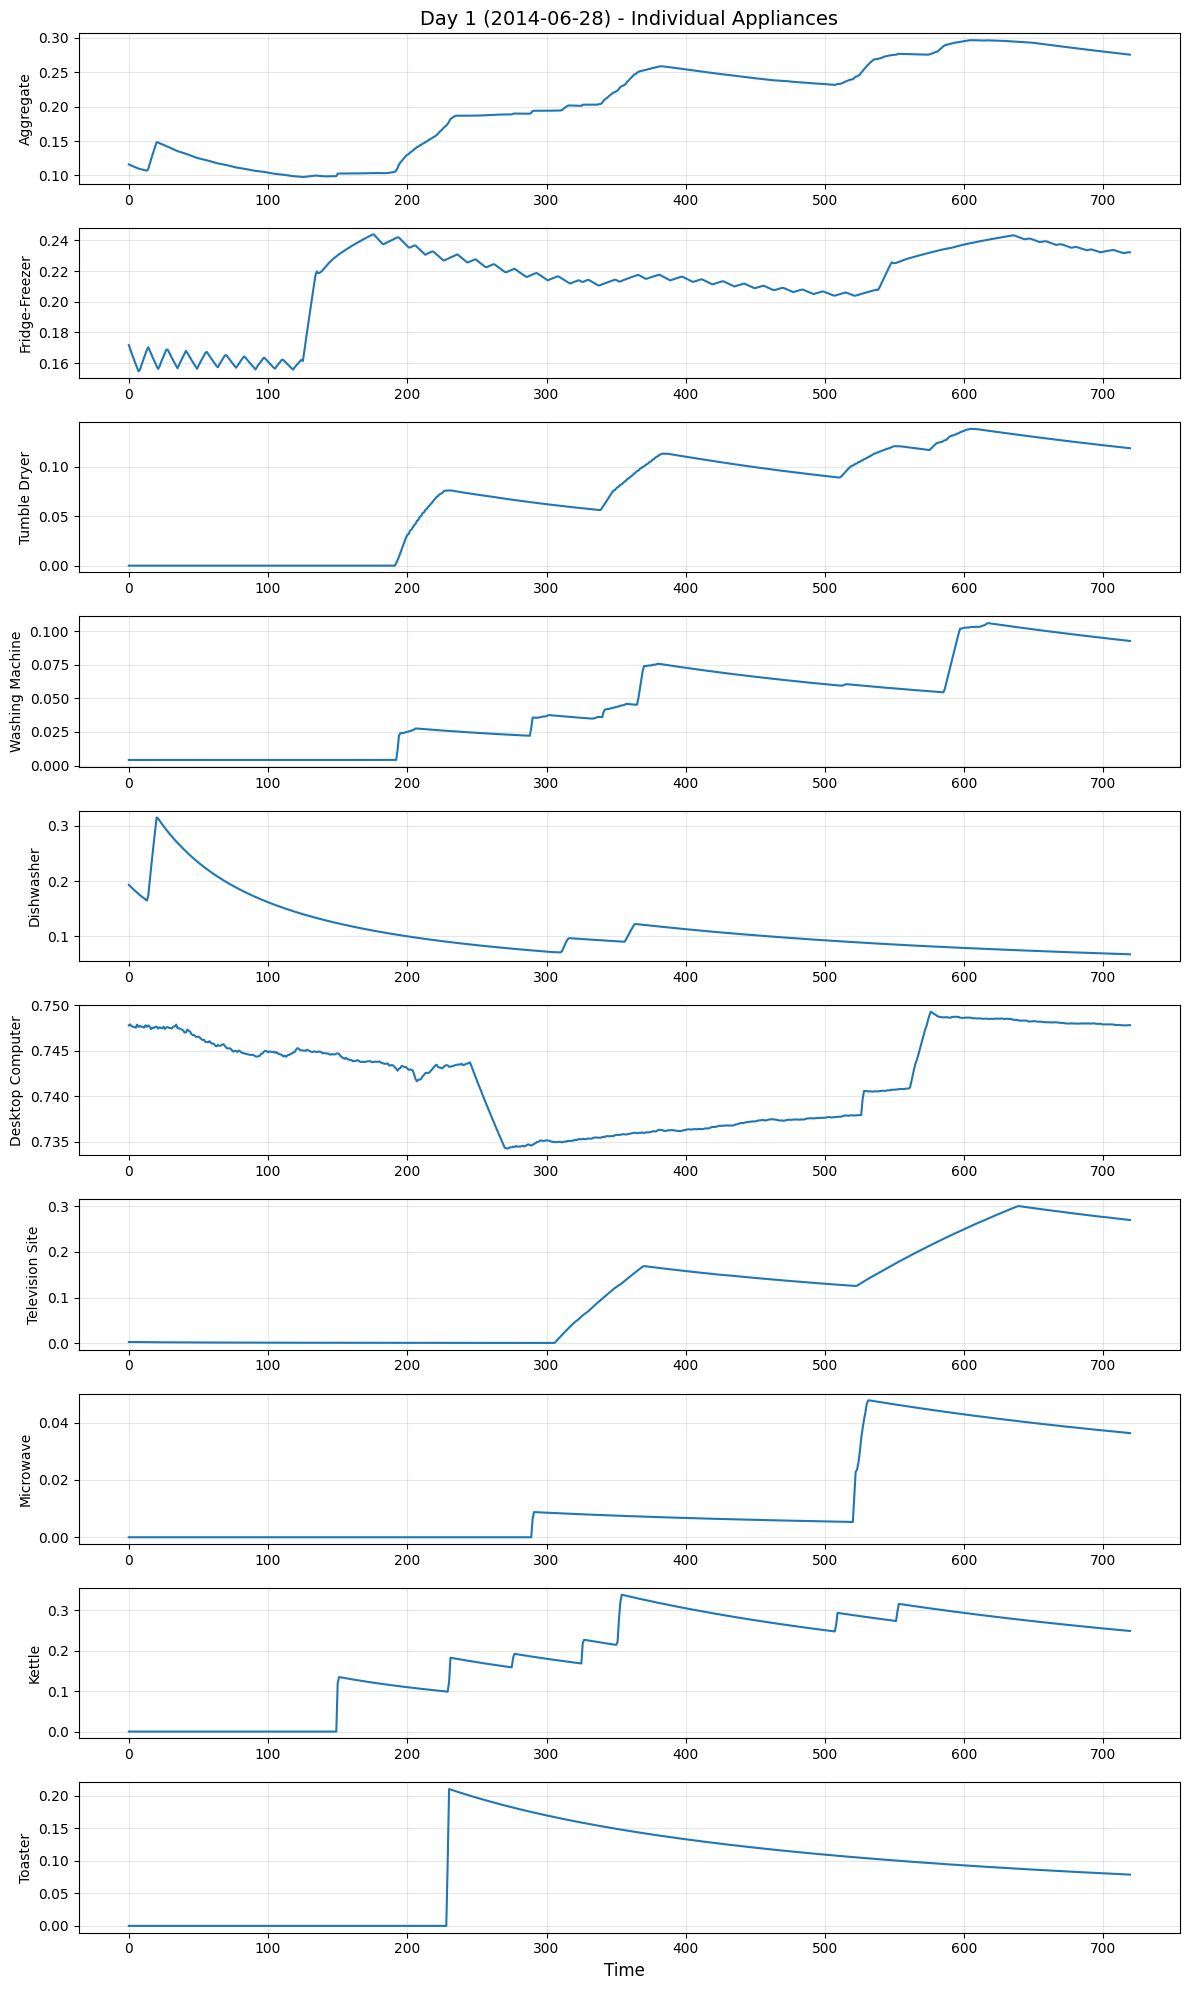

In [126]:
# Visualize all appliances for Day 1

# Get day 1 data
day_1 = daily_series.iloc[1]
day_date = daily_series.index[1].strftime('%Y-%m-%d')

# Reshape to separate timesteps and features
num_features = len(house5_scaled.columns)
num_timesteps = len(day_1) // num_features

day_1_reshaped = np.array(day_1).reshape(num_timesteps, num_features)

# Convert back to DataFrame for easier plotting
day_1_df = pd.DataFrame(day_1_reshaped, columns=house5_scaled.columns)

# Plot all appliances
plt.figure(figsize=(14, 8))

for col in day_1_df.columns:
    plt.plot(day_1_df[col], label=col, linewidth=2, alpha=0.8)

plt.title(f'Day 1 ({day_date}) - All Appliance Consumption (Scaled)', fontsize=14)
plt.xlabel('Time steps (2-min intervals)', fontsize=12)
plt.ylabel('Scaled Power Consumption', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Alternative: Individual subplots for each appliance
fig, axes = plt.subplots(len(house5_scaled.columns), 1,
                         figsize=(12, 2*len(house5_scaled.columns)))

for idx, col in enumerate(day_1_df.columns):
    axes[idx].plot(day_1_df[col], linewidth=1.5)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    if idx == 0:
        axes[idx].set_title(f'Day 1 ({day_date}) - Individual Appliances', fontsize=14)
    if idx == len(house5_scaled.columns) - 1:
        axes[idx].set_xlabel('Time  ', fontsize=12)

plt.tight_layout()
plt.show()